## Feature Engineering-1 Assignment Solution

Q1: What are missing values in a dataset? Why is it essential to handle missing values? Name some
algorithms that are not affected by missing values.

Answer -  The values or data that is not present for some variable/s in the given dataset. It is important to handle missing values as missing value can impact the analysis. 
It can lead to biased in the result.
It can lead to inaccurate predictions
It can affect the generalizability of the model

Some Techniques are
# 1. Mean Value Imputation - work well with normally distributed data 
# 2. Median Value Imputation Techniques
# 3. Mode Value Imputation
# 4. Random Sampling

## Q2: List down techniques used to handle missing data. Give an example of each with python code.

# 1. Mean Value Imputation - work well with normally distributed data 
# 2. Median Value Imputation Techniques
# 3. Mode Value Imputation

In [7]:
#Mean Value Imputation
#Example

import seaborn as sns

In [8]:
df = sns.load_dataset('titanic')

In [9]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [10]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<Axes: xlabel='age', ylabel='Count'>

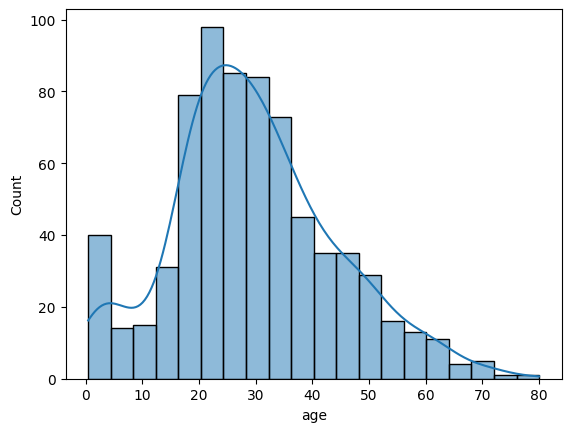

In [13]:
sns.histplot(df['age'], kde=True)

In [19]:
df['age_mean']= df['age'].fillna(df['age'].mean())

In [20]:
df[['age_mean', 'age']]

,age_mean,age
0,22.000000,22.0
1,38.000000,38.0
2,26.000000,26.0
3,35.000000,35.0
4,35.000000,35.0
...,...,...
886,27.000000,27.0
887,19.000000,19.0
888,29.699118,NaN
889,26.000000,26.0


<Axes: xlabel='age_mean', ylabel='Count'>

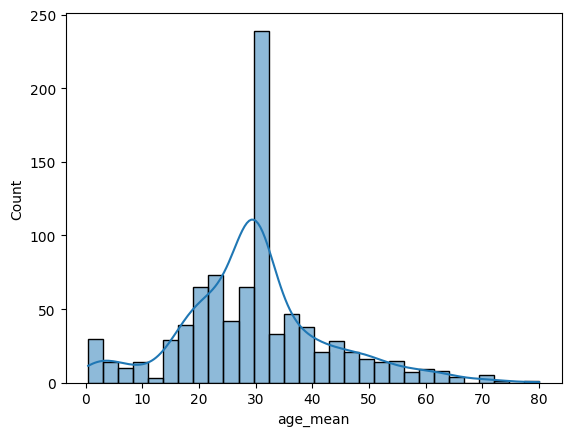

In [22]:
sns.histplot(df['age_mean'], kde=True)

## Median value imputation if we have outliers in the data set

In [24]:
df['age_median'] = df['age'].fillna(df['age'].median())

<Axes: xlabel='age_median', ylabel='Count'>

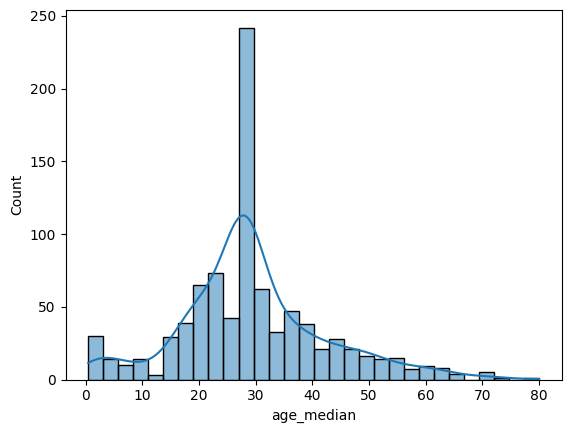

In [25]:
sns.histplot(df['age_median'], kde=True)

df[['age_median', 'age']]

In [26]:
df['age_median'] = df['age'].fillna(df['age'].median())

In [27]:
df[['age_median', 'age']]

,age_median,age
0,22.0,22.0
1,38.0,38.0
2,26.0,26.0
3,35.0,35.0
4,35.0,35.0
...,...,...
886,27.0,27.0
887,19.0,19.0
888,28.0,NaN
889,26.0,26.0


<Axes: xlabel='age_median', ylabel='Count'>

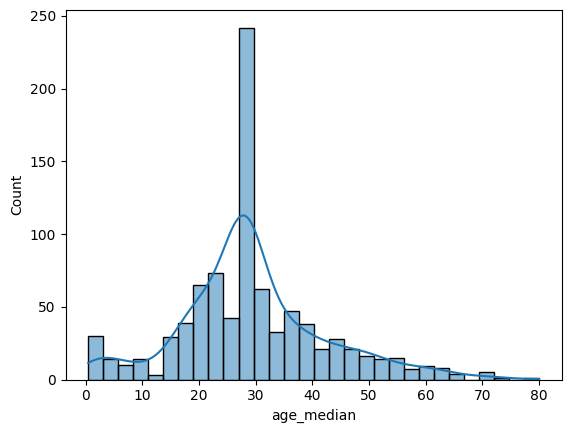

In [28]:
sns.histplot(df['age_median'], kde=True)

In [29]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_mean,age_median
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,22.000000,22.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,38.000000,38.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,26.000000,26.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,35.000000,35.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,35.000000,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,27.000000,27.0
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,19.000000,19.0
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,29.699118,28.0
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,26.000000,26.0


In [30]:
df[df['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_mean,age_median
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0


In [34]:
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [36]:
mode_value = df[df['embarked'].notna()]['embarked'].mode()[0]

In [37]:
df['embarked_mode']= df['embarked'].fillna(mode_value)

In [39]:
df[['embarked_mode', 'embarked']]

,embarked_mode,embarked
0,S,S
1,C,C
2,S,S
3,S,S
4,S,S
...,...,...
886,S,S
887,S,S
888,S,S
889,C,C


In [40]:
df[['embarked_mode', 'embarked']].isnull().sum()

embarked_mode    0
embarked         2
dtype: int64